# Initial Dev Notebook
- circa March 31, 2023

In [1]:
import os

In [1]:
# Folder structure
folders = [
    "1_preprocessing",
    "2_image_registration",
    "3_segmentation",
    "4_cell_counting",
    "5_analysis_and_visualization",
]

# Create folders
for folder in folders:
    os.makedirs(folder, exist_ok=True)

# Create README.md
with open("README.md", "w") as readme:
    readme.write(
        "# Rat Brain Segmentation\n\n"
        "This project aims to segment and count cells in a rat brain using light-sheet microscopy images, "
        "Python, SciKit-Image, and SciKit-Learn. The goal is to obtain cell counts per brain region using the "
        "EBrains rat brain atlas.\n\n"
        "## Steps\n\n"
        "1. Preprocessing\n"
        "2. Image registration\n"
        "3. Segmentation\n"
        "4. Cell counting\n"
        "5. Analysis and visualization\n\n"
        "## Installation\n\n"
        "Create a virtual environment and install the required dependencies:\n\n"
        "```\n"
        "pip install -r requirements.txt\n"
        "```\n\n"
        "## Usage\n\n"
        "Run each script in the numbered order. Adjust parameters and methods according to your specific data "
        "and requirements.\n\n"
        "## Contributing\n\n"
        "Please feel free to submit pull requests or open issues to discuss improvements or report bugs.\n\n"
        "## License\n\n"
        "[MIT](LICENSE)\n"
    )
    
    
    file.write("## Conda Environment\n\n")
    file.write("To create a new conda environment for this project, run the following command:\n\n")
    file.write("```\nconda create -n brain_segmentations python=3.9\n```\n\n")
    file.write("Activate the environment with:\n\n")
    file.write("```\nconda activate brain_segmentations\n```\n\n")
    file.write("Deactivate the environment with:\n\n")
    file.write("```\nconda deactivate\n```\n\n")

# Create requirements.txt
with open("requirements.txt", "w") as requirements:
    requirements.write(
        "numpy\n"
        "scikit-image\n"
        "scikit-learn\n"
        "SimpleElastix\n"
        "ANTsPy\n"
        "opencv-python\n"
        "matplotlib\n"
        "seaborn\n"
        "pandas\n"
    )

In [2]:
with open("environment.yml", "w") as file:
    file.write("name: brain_segmentations\n")
    file.write("channels:\n")
    file.write("- conda-forge\n")
    file.write("- defaults\n")
    file.write("dependencies:\n")
    file.write("- python=3.9\n")
    file.write("- numpy\n")
    file.write("- scikit-image\n")
    file.write("- scikit-learn\n")
    file.write("- opencv\n")
    file.write("- jupyter\n")  # Add the Jupyter package
    file.write("- ipykernel\n")  # Add the ipykernel package


In [2]:
import os

project_name = "brain_segmentations"
folders = [
    "01_preprocessing",
    "02_registration",
    "03_segmentation",
    "04_analysis",
    "data",
    "results"
]

# Create project folder and subfolders
os.makedirs(project_name, exist_ok=True)
for folder in folders:
    os.makedirs(os.path.join(project_name, folder), exist_ok=True)

# Create scripts in each subfolder
script_names = [
    "preprocessing.py",
    "registration.py",
    "segmentation.py",
    "analysis.py"
]

for i, script_name in enumerate(script_names, start=1):
    script_path = os.path.join(project_name, f"{i:02}_"+script_name.split(".")[0], script_name)
    with open(script_path, "w") as script_file:
        script_file.write("#!/usr/bin/env python\n\n")
        script_file.write(f"# {script_name}\n")
        script_file.write("# Add your code here\n")

### Imports

In [7]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt


### Paths

In [10]:
ROOT = 'Z://Collaboration_data/Iordonova_lab/'

# ex_file = '341880_413020_006000.tif'
ex_file = '347890_408640_057040.tif'


### I/O

In [16]:
from skimage import io
import matplotlib.pyplot as plt

def load_and_display_tiff(file_path):
    img = io.imread(file_path)
    
    img_min = 0#img.min()
    img_max = 400#img.max()
#     print(img_min,img_max)
    plt.imshow(img, cmap='gray', vmin=img_min, vmax=img_max)
    plt.axis('off')
    plt.show()

# # file_path = 'path/to/your/tiff_file.tiff'
# # load_and_display_tiff(file_path)

# file_path = os.path.join(ROOT,ex_file)
# load_and_display_tiff(file_path)

C:\Users\tyler\AppData\Local\Temp\ipykernel_8076\2204534171.py:38: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_img1 = mode(img1.flatten())[0][0]
C:\Users\tyler\AppData\Local\Temp\ipykernel_8076\2204534171.py:39: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
 

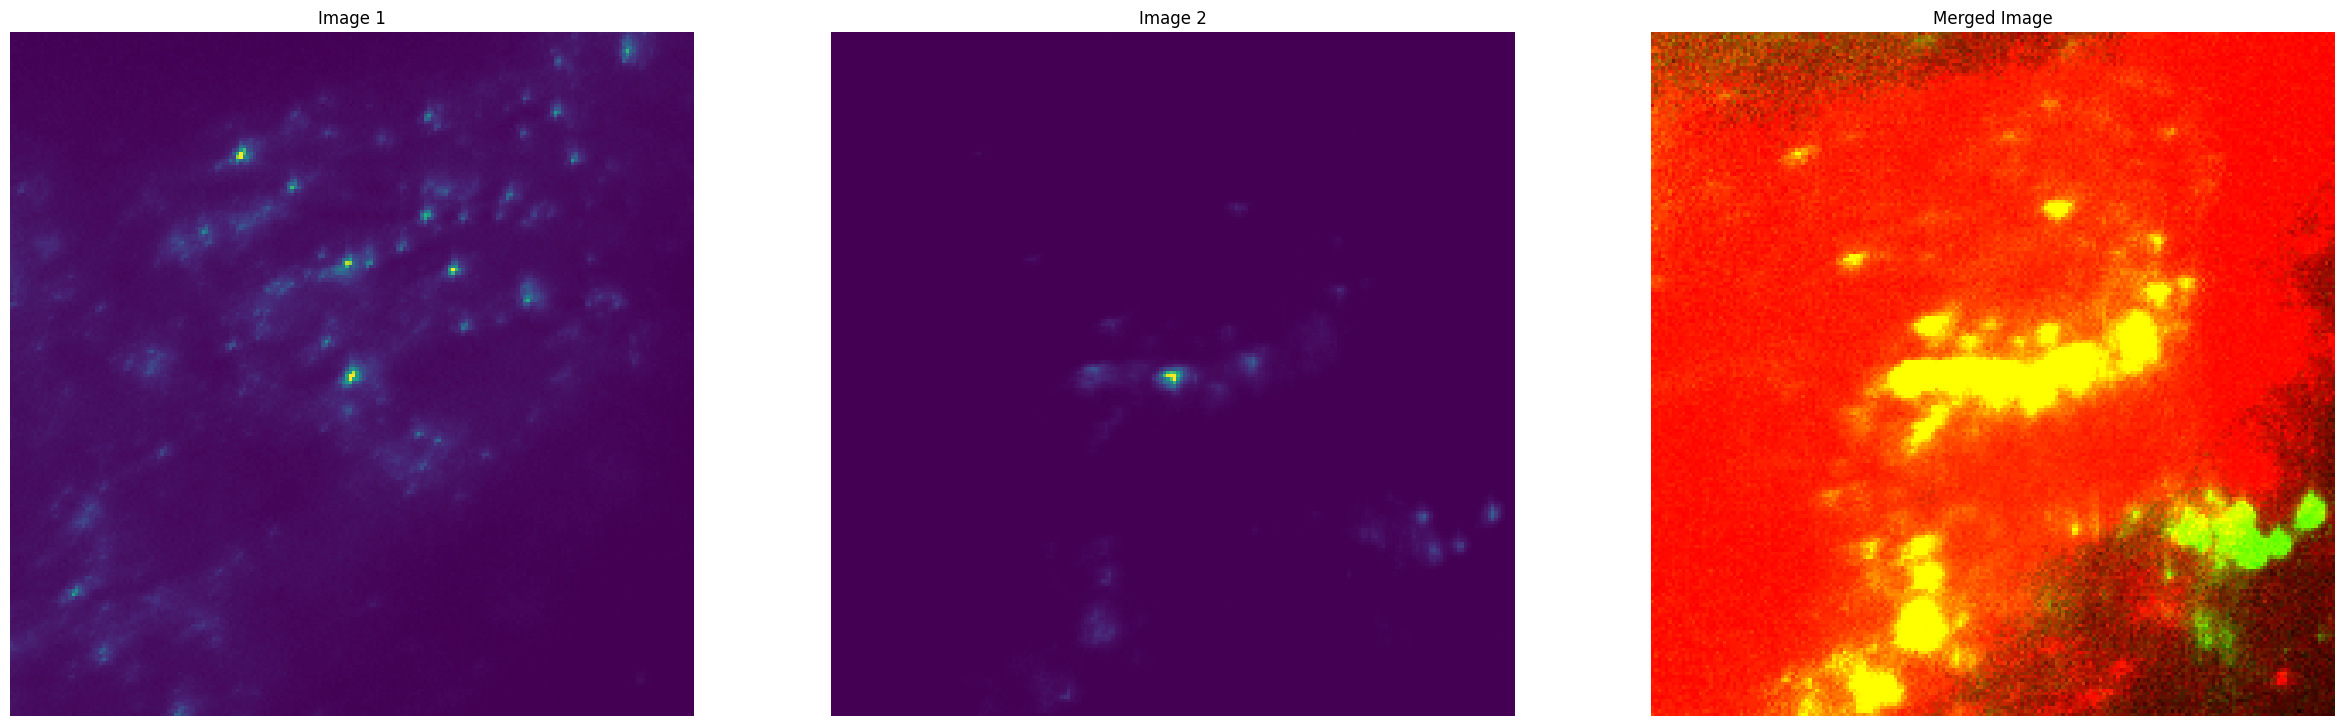

In [29]:
from skimage import io
import matplotlib.pyplot as plt
from scipy.stats import mode
# import scipy

# def load_and_display_tiffs(file_path1, file_path2):
#     img1 = io.imread(file_path1)
#     img2 = io.imread(file_path2)
    
#     img1_min, img1_max = 0,400#img1.min(), img1.max()
#     img2_min, img2_max = 0,400#img2.min(), img2.max()

#     fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
    
#     axes[0].imshow(img1, cmap='gray', vmin=img1_min, vmax=img1_max)
#     axes[0].axis('off')
#     axes[0].set_title('Image 1')
    
#     axes[1].imshow(img2, cmap='gray', vmin=img2_min, vmax=img2_max)
#     axes[1].axis('off')
#     axes[1].set_title('Image 2')

#     plt.tight_layout()
#     plt.show()

# import numpy as np
# from skimage import io
# import matplotlib.pyplot as plt

def load_and_display_tiffs(file_path1, file_path2):
    img1 = io.imread(file_path1)
    img2 = io.imread(file_path2)


    img1_max = img1.max()
    img2_max = img2.max()

    mode_img1 = mode(img1.flatten())[0][0]
    mode_img2 = mode(img2.flatten())[0][0]

    max_pixel_y1, max_pixel_x1 = np.unravel_index(np.argmax(img1), img1.shape)
    max_pixel_y2, max_pixel_x2 = np.unravel_index(np.argmax(img2), img2.shape)

    crop_size = 100

    cropped_img1 = img1[max_pixel_y1-crop_size:max_pixel_y1+crop_size, max_pixel_x1-crop_size:max_pixel_x1+crop_size]
    cropped_img2 = img2[max_pixel_y2-crop_size:max_pixel_y2+crop_size, max_pixel_x2-crop_size:max_pixel_x2+crop_size]

    overlaid_image = np.dstack([cropped_img1, cropped_img2, np.zeros_like(cropped_img1)])
    
    
    # Artificially set values
    img1_max = 10000
    img2_max = 10000
    
    
    fig, axes = plt.subplots(1, 3, figsize=(30, 10))
    
    axes[0].imshow(cropped_img1, vmin=100, vmax=img1_max)
    axes[0].axis('off')
    axes[0].set_title('Image 1')

    axes[1].imshow(cropped_img2, vmin=100, vmax=img2_max)
    axes[1].axis('off')
    axes[1].set_title('Image 2')

    axes[2].imshow(overlaid_image, vmin=100, vmax=max(img1_max, img2_max))
    axes[2].axis('off')
    axes[2].set_title('Merged Image')

    plt.show()

    return cropped_img1, cropped_img2



img_identifier = '347890_408640_057040'
fos_path = ROOT + '/fos_' +img_identifier+'.tif'
neun_path =  ROOT + '/neun_' +img_identifier+'.tif'
img1_crop, img2_crop = load_and_display_tiffs(neun_path, fos_path)


In [32]:
import numpy as np
from skimage import io, morphology
from skimage.morphology import disk

def top_hat_transform(image, selem_size=5):
    """
    Apply a top-hat transform filtering operation to an image.

    Parameters:
    -----------
    image : ndarray
        Input image.
    selem_size : int, optional, default: 5
        Size of the structuring element used for the top-hat transform.

    Returns:
    --------
    result : ndarray
        Image after applying the top-hat transform.
    """
    selem = disk(selem_size)
    result = morphology.white_tophat(image, selem)
    return result

In [30]:
# file_path = 'path/to/your/image.tiff'
# image = io.imread(file_path)

# Apply top-hat transform
processed_image = top_hat_transform(image)

# Display original and processed images side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(image, cmap='gray')
axes[0].axis('off')
axes[0].set_title('Original Image')

axes[1].imshow(processed_image, cmap='gray')
axes[1].axis('off')
axes[1].set_title('Top-Hat Transformed Image')

plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'E:\\Documents\\Professional\\Jupyter notebooks\\Projects\\Iordonova_lab\\path\\to\\your\\image.tiff'

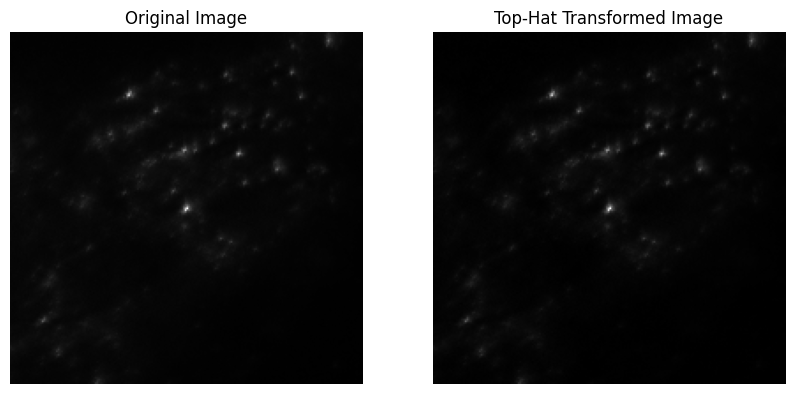

In [38]:
# top_hat_transform(img1_crop, selem_size=5)

# Apply top-hat transform
processed_image = top_hat_transform(img1_crop, selem_size=100)

# Display original and processed images side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(img1_crop, cmap='gray')
axes[0].axis('off')
axes[0].set_title('Original Image')

axes[1].imshow(processed_image, cmap='gray')
axes[1].axis('off')
axes[1].set_title('Top-Hat Transformed Image')

plt.show()


In [40]:
img1 = io.imread(fos_path)

In [39]:
import numpy as np

def crop_image(image, crop_size, mode='random', overlap=0):
    height, width = image.shape
    crop_height, crop_width = crop_size

    if mode == 'random':
        start_y = np.random.randint(0, height - crop_height + 1)
        start_x = np.random.randint(0, width - crop_width + 1)

        cropped_image = image[start_y : start_y + crop_height, start_x : start_x + crop_width]

    elif mode == 'grid':
        grid_height = (height - crop_height) // (crop_height - overlap) + 1
        grid_width = (width - crop_width) // (crop_width - overlap) + 1

        cropped_images = []

        for i in range(grid_height):
            for j in range(grid_width):
                start_y = i * (crop_height - overlap)
                start_x = j * (crop_width - overlap)

                cropped_image = image[start_y : start_y + crop_height, start_x : start_x + crop_width]
                cropped_images.append(cropped_image)

        return cropped_images

    else:
        raise ValueError("Invalid mode specified. Choose either 'random' or 'grid'.")

    return cropped_image


# Example usage:
# image = np.random.randint(0, 255, size=(500, 500), dtype=np.uint8)
crop_size = (1000, 1000)

random_crops = crop_image(image, crop_size, random_crop=True)
print("Random crop:")
print(random_crops[0])

grid_crops = crop_image(image, crop_size, random_crop=False)
print("Grid crops:")
for i, crop in enumerate(grid_crops):
    print(f"Grid crop {i + 1}:")
    print(crop)


Random crop:
[[180 202 225 ...  85  54 185]
 [ 40  28  69 ... 205 119  96]
 [191 247 174 ... 225  38  77]
 ...
 [ 44 185 169 ...   9 118 203]
 [ 48  71 113 ...  58 152 201]
 [  5  11  11 ... 128  30 186]]
Grid crops:
Grid crop 1:
[[136 168  22 ... 146  47   9]
 [ 27 102  79 ...  74 172  64]
 [159 127 170 ... 177  62  86]
 ...
 [121 187  39 ... 250 135 189]
 [ 60  69  72 ... 137 143   3]
 [180  79  49 ... 166 145 182]]
Grid crop 2:
[[ 95 204  88 ... 157   0  48]
 [111  80  53 ... 116  35   5]
 [ 92 137 239 ... 119 171 164]
 ...
 [140 173  81 ...  71  97  82]
 [ 39 217  69 ... 223  23  12]
 [156  87 187 ... 141 211 182]]
Grid crop 3:
[[ 32  14  75 ... 183  72  71]
 [125  47 202 ...  92 186  87]
 [164 198 117 ... 163 125 178]
 ...
 [119 172 126 ... 143 242 196]
 [179  70  77 ...  63  33 201]
 [191 189 123 ...  22 191 184]]
Grid crop 4:
[[121  78 117 ... 238  15 163]
 [156 249  52 ... 196  29  16]
 [ 60  54  97 ...  68 115 173]
 ...
 [122 113 196 ... 226 192  94]
 [ 27 248  55 ...   6 238 

In [56]:
img1.shape

(17441, 11010)

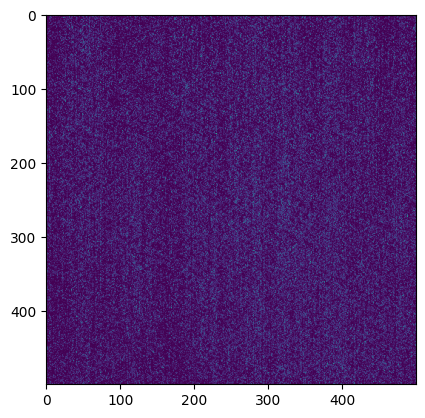

In [66]:
crop_size = (500, 500)
random_crops = crop_image(img1, crop_size, random_crop=True)
plt.imshow(random_crops[0])

Grid crops:
Grid crop 1:


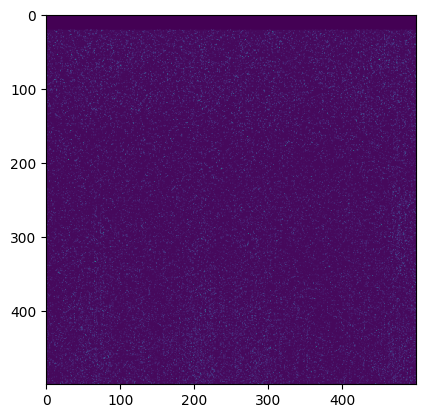

Grid crop 2:


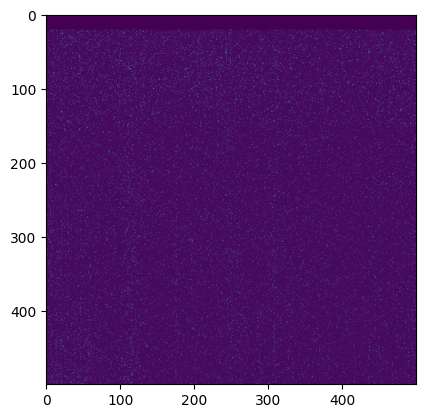

Grid crop 3:


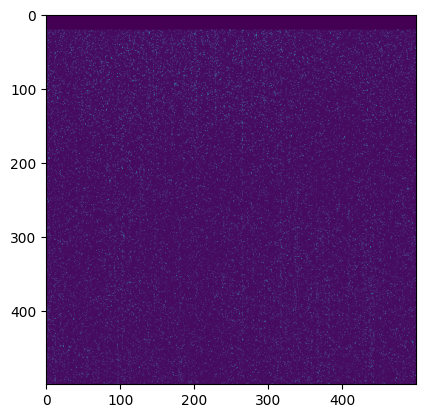

Grid crop 4:


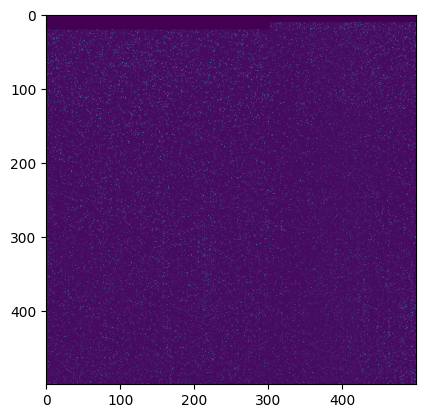

Grid crop 5:


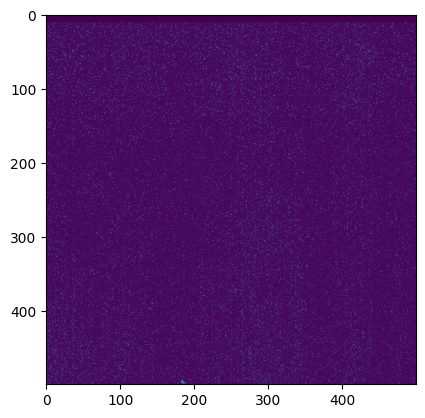

Grid crop 6:


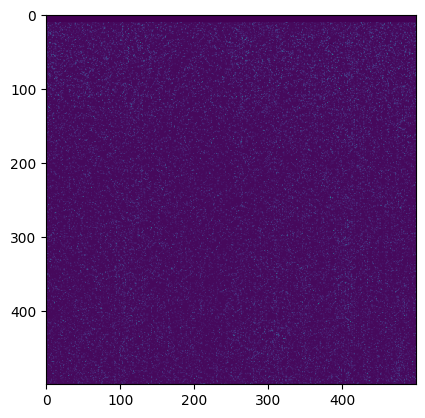

Grid crop 7:


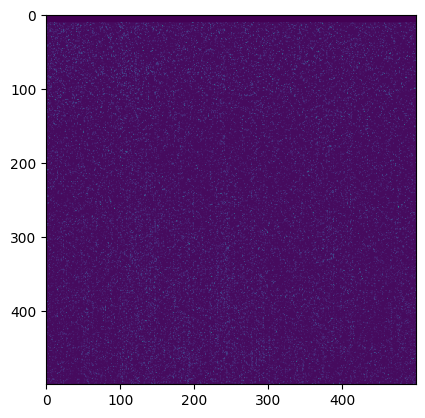

Grid crop 8:


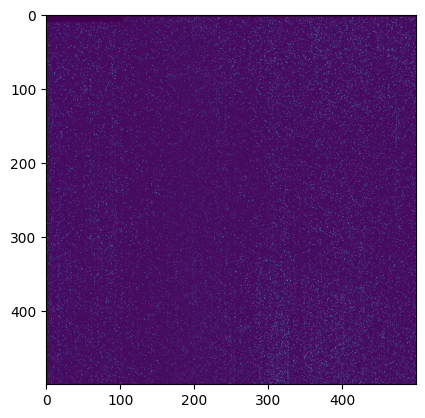

Grid crop 9:


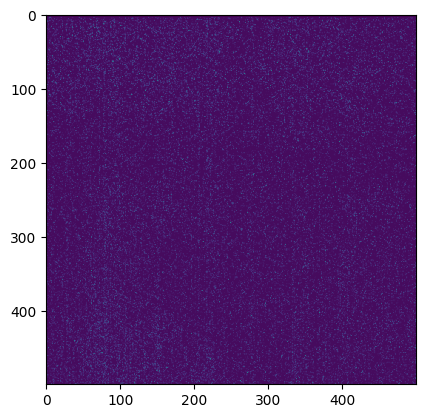

Grid crop 10:


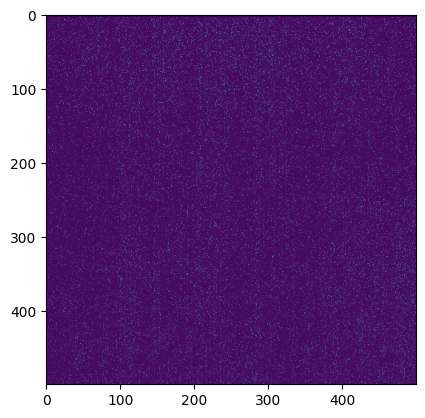

Grid crop 11:


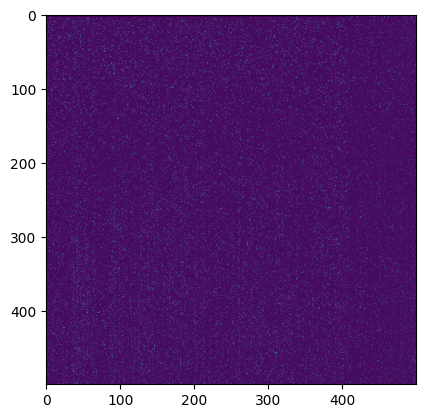

Grid crop 12:


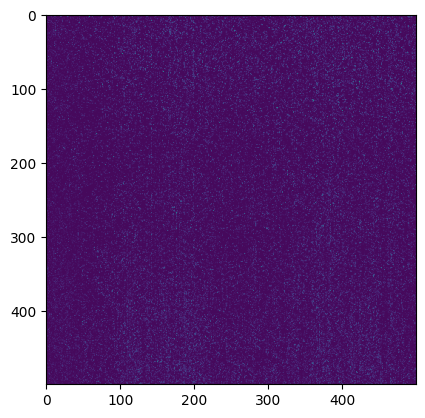

Grid crop 13:


KeyboardInterrupt: 

In [64]:
grid_crops = crop_image(img1, crop_size, random_crop=False)
print("Grid crops:")
for i, crop in enumerate(grid_crops):
    print(f"Grid crop {i + 1}:")
#     print(crop)
    plt.imshow(crop)
    plt.show()

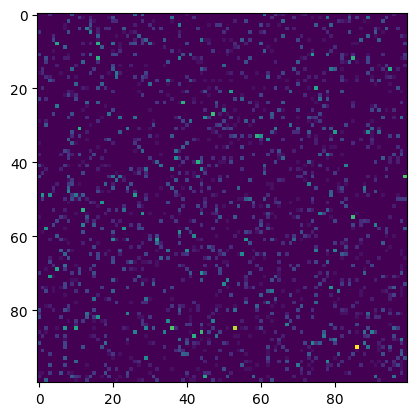

In [89]:
crop_size = (100, 100)
random_crops = crop_image(img1, crop_size, random_crop=True)
plt.imshow(random_crops[0])

In [92]:
crop_img = random_crops[0]

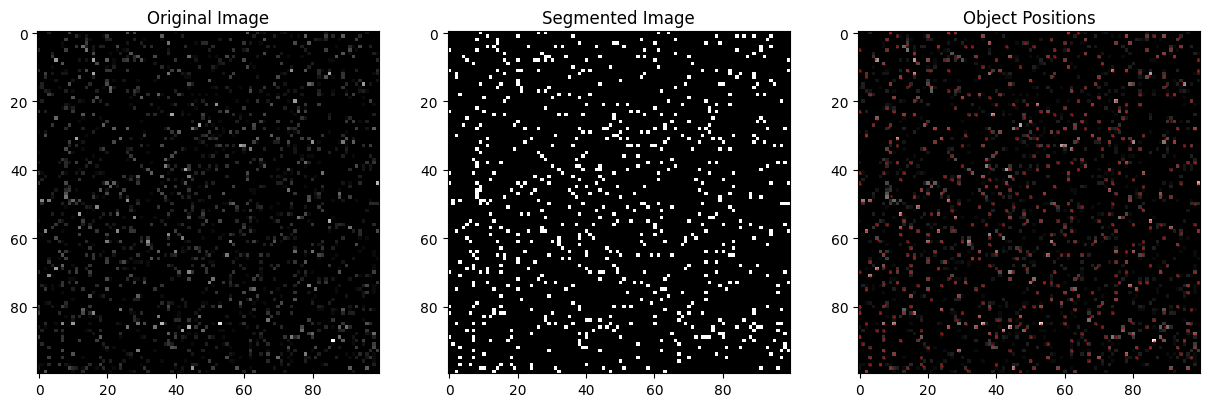

In [97]:
import numpy as np
import skimage.filters
import skimage.measure
from skimage.measure import regionprops_table
import matplotlib.pyplot as plt

def segment_image(image, method='otsu', custom_threshold=None):
    if method == 'otsu':
        threshold = skimage.filters.threshold_otsu(image)
    elif method == 'mean':
        threshold = np.mean(image)
    elif method == 'custom':
        if custom_threshold is not None:
            threshold = custom_threshold
        else:
            raise ValueError("Please provide a custom threshold value.")
    else:
        raise ValueError("Invalid method specified. Choose either 'otsu', 'mean', or 'custom'.")

    segmented_image = image > threshold
    labeled_image = skimage.measure.label(segmented_image)
    properties = regionprops_table(labeled_image, properties=('centroid',))
    positions = np.column_stack([properties['centroid-0'], properties['centroid-1']])
    
    return segmented_image, positions

def compare_segmentation(image, segmented_image, positions):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].imshow(image, cmap='gray')
    axes[0].set_title('Original Image')
    axes[1].imshow(segmented_image, cmap='gray')
    axes[1].set_title('Segmented Image')

    axes[2].imshow(image, cmap='gray')
    axes[2].scatter(positions[:, 1], positions[:, 0], c='red', s=1, marker='o', alpha=0.5)
    axes[2].set_title('Object Positions')

    plt.show()

# Example usage
# image = ...
# segmented_image, positions = segment_image(image)
# compare_segmentation(image, segmented_image, positions)

# Example usage
# image = np.random.random((100, 100))  # Replace with your actual image
segmented_image, positions = segment_image(crop_img, method='otsu')
compare_segmentation(crop_img, segmented_image, positions)
